<a href="https://colab.research.google.com/github/Debasmita-Pal/Single_Layer_Perceptron/blob/main/20MAI0018_ASS1_QS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
path ='https://github.com/Debasmita-Pal/Single_Layer_Perceptron/blob/main/20MAI0018_ASS1_QS2.ipynb'
'REG NO : 20MAI0018'

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1Qjiv7gppEn2Mua862PMuX02YTVNLUCxL'
downloaded = drive.CreateFile({'id': file_id})

In [27]:
downloaded.GetContentFile('seeds_dataset.xlsx')

In [28]:
!ls -lha seeds_dataset.xlsx

-rw-r--r-- 1 root root 21K Feb 26 09:35 seeds_dataset.xlsx


In [29]:
!pip install -q xlrd

import pandas as pd
df = pd.read_excel('seeds_dataset.xlsx')
df

,15.260,14.840,0.871,5.763,3.312,2.221,5.220,1.000
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [30]:
import numpy as np
print(df.head())
print(df.info())

   15.260  14.840  0.871   5.763   3.312   2.221   5.220   1.000 
0   14.88   14.57  0.8811   5.554   3.333   1.018   4.956       1
1   14.29   14.09  0.9050   5.291   3.337   2.699   4.825       1
2   13.84   13.94  0.8955   5.324   3.379   2.259   4.805       1
3   16.14   14.99  0.9034   5.658   3.562   1.355   5.175       1
4   14.38   14.21  0.8951   5.386   3.312   2.462   4.956       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   15.26   209 non-null    float64
 1   14.84   209 non-null    float64
 2   0.871   209 non-null    float64
 3   5.763   209 non-null    float64
 4   3.312   209 non-null    float64
 5   2.221   209 non-null    float64
 6   5.22    209 non-null    float64
 7   1.0     209 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
None


In [31]:
df.shape

(209, 8)

In [32]:
varnames=['A'+str(s) for s in range(1,9)]
df.columns=varnames
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [33]:
print(df['A8'].unique())

[1 2 3]


In [34]:
x=df.drop('A8',axis=1)
y=df['A8']
print(x.head(2))
print(y.head(2))

      A1     A2      A3     A4     A5     A6     A7
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
0    1
1    1
Name: A8, dtype: int64


Splitting to training and testing


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(y_test.shape)

(146, 7)
(63,)


Train the model

In [36]:
from sklearn.linear_model import Perceptron
per=Perceptron(random_state=0)

Training

In [37]:
per.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Testing

In [38]:
pred=per.predict(x_test)
pred

array([3, 2, 2, 1, 1, 3, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 3, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 1, 1, 1])

Accuracy of model

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred)*100

Accuracy score


85.71428571428571

Confusion Matrix

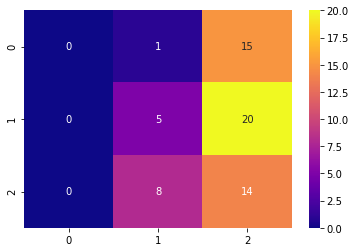

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1=confusion_matrix(y_test,pred1)
sns.heatmap(cm1, cmap="plasma",annot=True)

Classification report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.67      0.88      0.76        16
           2       0.93      1.00      0.96        25
           3       1.00      0.68      0.81        22

    accuracy                           0.86        63
   macro avg       0.86      0.85      0.84        63
weighted avg       0.89      0.86      0.86        63

